# Bike Sharing Demand Prediction

In this segment we have come across a situation where a U.S. based company called as BhoomBikes has suffered considerable downtrend in their revenues due to the ongoing Corona pandemic. Thereby company is finding it very difficult to bear this loss  in the current market scenario. So, this company has decided to come up with a good business plan, where it can make some profit with its revenue increase as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

So company Bhoombikes has tried to consult a data analyst company to help them with business plan which helps them to make profit.

### Business Goal
So we need to design a model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. Further, the same could be utilised to predict market situation to understand the demand dynamics of a new market. 

### Steps required to build multilinear regression model
- To Visualize the data (EDA)
- Data Preprocessing
- Building the model
- Residual Analysis
- Predictions and model evaluation
- Conclusion

In [1]:
### ignoring all the warning that might come
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import all the libraries required 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import seaborn as sns 
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


### Overview of the Data Set

In [3]:
# load data set
bikehire = pd.read_csv("day.csv")
bikehire.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# to find shape of data
bikehire.shape

(730, 16)

upon finding the shape of data we understand that data has 730 observations with 16 columns

In [5]:
# to check if data has any missing values
bikehire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#checking for null values
bikehire.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

From the above data information we understand that there are 16 columns with all numeric values with no missing or null values

In [7]:
# To get about which are numerical type and categorical type variables are present in data set we use nunique()
bikehire.nunique().sort_values()

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
casual        605
windspeed     649
registered    678
atemp         689
cnt           695
instant       730
dteday        730
dtype: int64

From the above nunique function we understand
- yr, holiday, workingday, weathersit, season, weekday, mnth are categorical data
- temp, hum, casual, windspeed, registered, atemp, cnt, instant are numerical data
- dteday is numerical data of object type.

### Data Summary

In [8]:
# To Check important metrics like min, max, mean of data
bikehire.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
season,730.0,2.498630,1.110184,1.000000,2.000000,3.000000,3.000000,4.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.997260,2.006161,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800


From the above observation we understand the difference between mean and 50% - median there is not much so it can be inffered that there are no outliers.

### Insights of the data

Upon understanding the data, below mentioned insights of data is observed.

- No collumn has null value.
- The dteday collumn which is of object type should be converted to datetime data type.
- Bike demand is depicted by cnt varible which is sum of number of casual and number of registered people.
- Numerical and categorical data can be recognised using nunique function which returns how many distinct values are there in   that column.
    - We observe [yr, holiday, workingday, weathersit, season, weekday, mnth] are categorical values as there unquie values are minimal there by they are divided into those categories.
    - Variables [temp, hum, casual, windspeed, registered, atemp, cnt, instant] are numerical values as there many distinct values.


### Data Cleaning

Before we work on data visualization let us try to convert one dteday varible from object to date format

In [9]:
# conversion dteday from object type to date format
bikehire['dteday'] = bikehire['dteday'].astype('datetime64') 
bikehire.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
# reconfirming if object type is changed to date format
bikehire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null datetime64[ns]
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(11)
memory usage: 91.4 KB


#### Renaming the column

In [11]:
# Renaming the column heads for better readability

bikehire = bikehire.rename(columns = {'dteday': 'date', 'yr': 'year', 'mnth':'month','temp':'temperature','atemp':'apparant_temperature', 'hum':'humidity', 'cnt':'count'}, inplace = False)
bikehire.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temperature,apparant_temperature,humidity,windspeed,casual,registered,count
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Mapping the column content as per attributes

- Season
- Month
- Weekday
- Weathersit

In [12]:
# Mapping of Season 
bikehire['season'] = bikehire['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

# Mapping of Month 
bikehire['month'] = bikehire['month'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug',
                        9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

# Mapping of weekday
bikehire['weekday'] = bikehire['weekday'].map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'})

# Mapping of weathersit 
bikehire['weathersit'] = bikehire['weathersit'].map({1:'Clear', 2:'Mist + Cloudy', 3:'Light Snow', 4:'Snow + Fog'})

bikehire.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temperature,apparant_temperature,humidity,windspeed,casual,registered,count
0,1,2018-01-01,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Data Visualization

Data visualization here has been mainly done in three ways to interpret data in better way.

- Independent, individual data visualization.
- Visualization of Numerical Data.
- Visualization of Categorical Data
- Visualization summary

### Visualization of Individual Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000281EEC84488>,
      dtype=object)

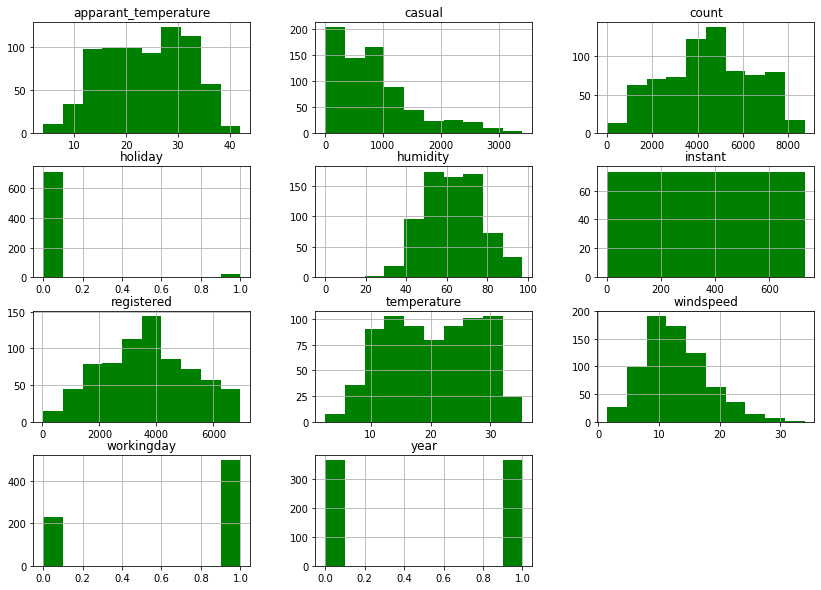

In [13]:
# Visualization of individual data 
bikehire.hist(figsize=(14,10), color='green')

#### Observations 

So here we are having totally 15 varibales whose individual observation are as follows

- Though we see temp is high at 15, 27 and 30 degree celcius, apparent temp is high only at 30 degree celcius.
- There are more number of registered users than casual users.
- Useage of bike across is done in all season, weekdays, in both years 2018,2019.
    - Specific observation with respect to which season, weekday and year more users are present will be done later.
- More useage of bikes are done when weather is more clear than other bad weather days.


###  Visualization of numerical data

As we know variables temperature, apparant_temperature, humidity, windspeed, casual, registered, count are numerical values.
So will have to visualize data to understand 

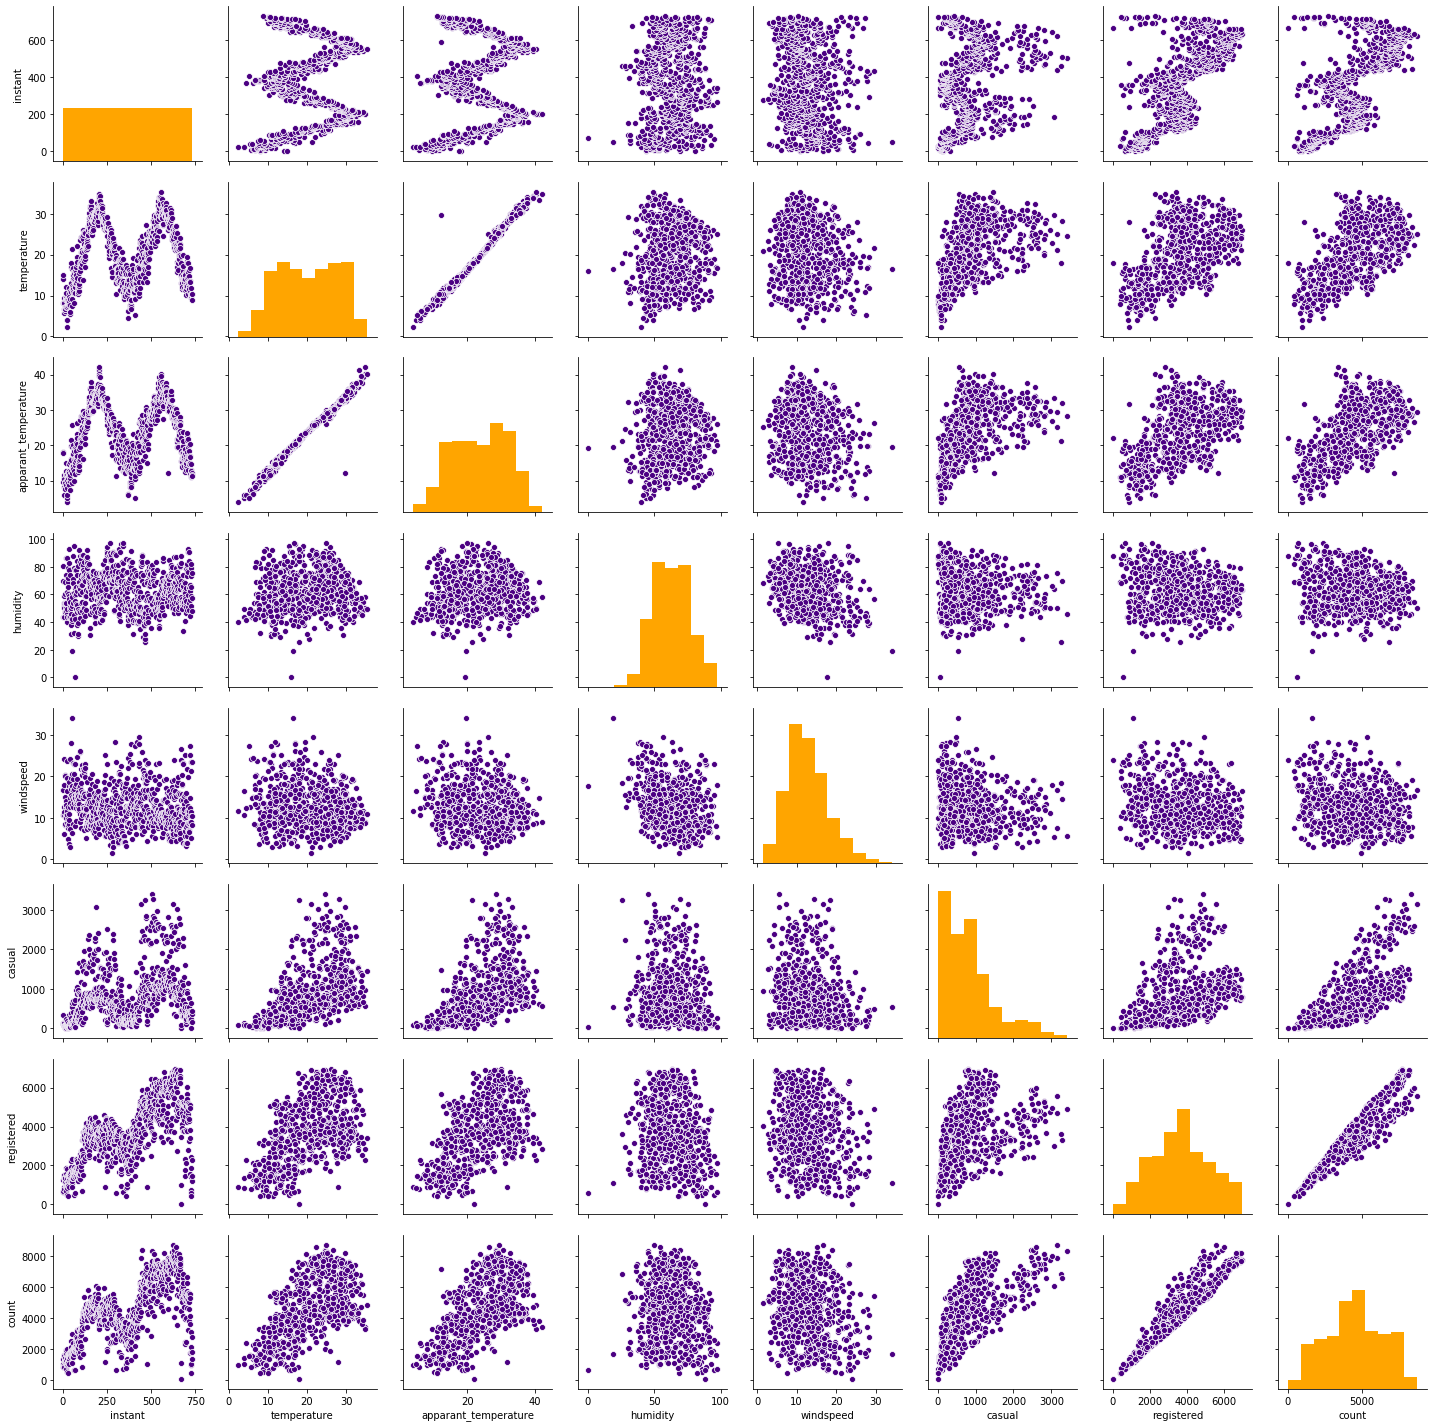

In [14]:
bkplt = ['instant','temperature', 'apparant_temperature', 'humidity', 'windspeed', 'casual', 'registered' , 'count']
g = sns.PairGrid(bikehire, 
             vars = bkplt)
g.map_lower(sns.scatterplot, color='indigo')
g.map_upper(sns.scatterplot, color='indigo')
g.map_diag(plt.hist, color='orange')


#### Observations
- From above pairplot its easier to do simultaneous univariate analysis across diagnol and bivariate analysis in rest of graph
- When variables across diagnols are seen, we obseve uniform distribution for temperature, apparant temperature, humidity, windspeed, registered and count.
- When observed in diagnol for casual users a right skew is observed, however this attribute would be reconsidered if it influences bike rentals.
- Influence of instant variable on bike rentals will be rechecked later.
- With the help of upper and lower diagnol graphs 
    - The casual users and registered users have linear relation with count.
    - The temparature and apparant temperature also has linear relation but widely spread across regression line.
    - The variables humidity and windspeed is scattered across regression line.

#### To get more understanding how indivisual numerical variables are influencing count variable will check one by one

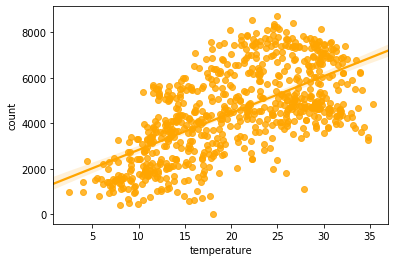

In [15]:
# Check how temperature variable influencing count variable
sns.regplot(x='temperature',y='count',data=bikehire, color='orange')
plt.show()

- Bike Rentals is increasing gradually as there is rise in temperature.
- Count of bike hire is more when temperature is 25 degree celcius.

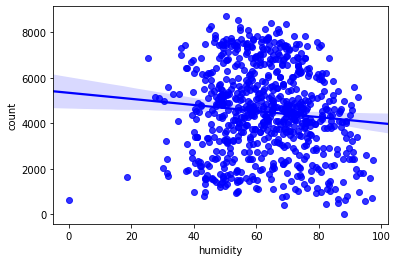

In [16]:
# Check the relation between humidity & Count
sns.regplot(x='humidity', y='count',data=bikehire, color='blue')
plt.show()

- Bike rental is more when humidity is more.
- Seems to be dense between 40 and 80 units.

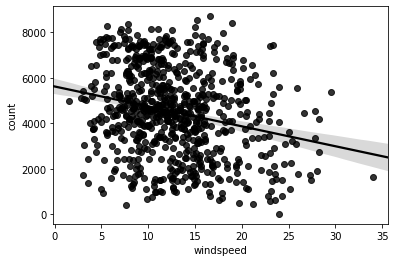

In [17]:
# Check the relation between windspeed & count
sns.regplot(x='windspeed',y='count',data=bikehire, color='black')
plt.show()

- Bike rental is more when windspeed is moderate.
- Seems to be dense between 10 and 20 units.

### Vizualization of categorical data

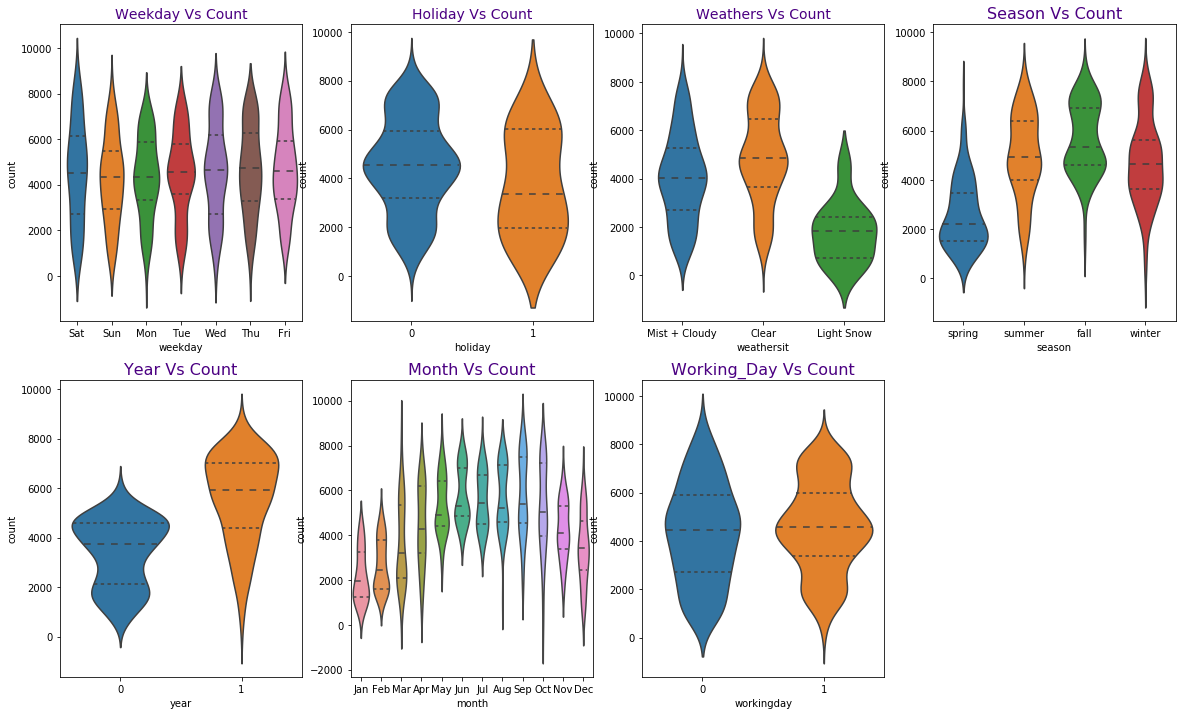

In [18]:
plt.figure(figsize=(20, 12))

plt.subplot(2,4,1)
sns.violinplot(x = 'weekday', y = 'count', data = bikehire, inner="quartile")
plt.title("Weekday Vs Count", fontsize=14, color= "indigo")

plt.subplot(2,4,2)
sns.violinplot(x = 'holiday', y = 'count', data = bikehire, inner="quartile")
plt.title("Holiday Vs Count", fontsize=14, color= "indigo")

plt.subplot(2,4,3)
sns.violinplot(x = 'weathersit', y = 'count', data = bikehire, inner="quartile")
plt.title("Weathers Vs Count", fontsize=14, color= "indigo")

plt.subplot(2,4,4)
sns.violinplot(x = 'season', y = 'count', data = bikehire, inner="quartile")
plt.title("Season Vs Count", fontsize=16, color= "indigo")

plt.subplot(2,4,5)
sns.violinplot(x = 'year', y = 'count', data = bikehire, inner="quartile")
plt.title("Year Vs Count", fontsize=16, color= "indigo")

plt.subplot(2,4,6)
sns.violinplot(x = 'month', y = 'count', data = bikehire, inner="quartile")
plt.title("Month Vs Count", fontsize=16, color= "indigo")

plt.subplot(2,4,7)
sns.violinplot(x = 'workingday', y = 'count', data = bikehire, inner="quartile")
plt.title("Working_Day Vs Count", fontsize=16, color= "indigo")

plt.show()

#### Observations
- Bike Rental booking count is evenly spread on all days of week.
- Bike booking count is more when weather is clear, than on rainy or misty weather days.
- The count of bike booking is more in year 2019 when compared to 2018.
- In the summer and fall season bike booking is more when compared to spring and winter.


#### To get more understanding how month, holiday variable is influencing count variable can be checked

Text(0.5, 1.0, 'Month Vs Count')

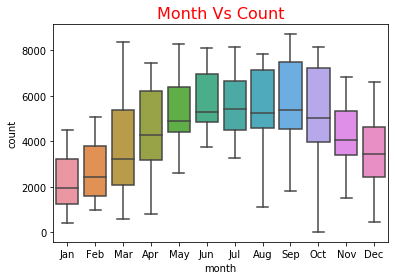

In [19]:
# To check how month variables varies with count variable
sns.boxplot(x = 'month', y = 'count', data = bikehire)
plt.title("Month Vs Count", fontsize=16, color= "red")


Bike rental count is more during March, April followed by August, Spetember, October.

Text(0.5, 1.0, 'Holiday Vs Count')

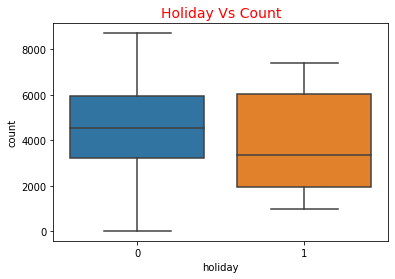

In [20]:
# To check how holiday variables varies with count variable
sns.boxplot(x = 'holiday', y = 'count', data = bikehire)
plt.title("Holiday Vs Count", fontsize=14, color= "red")

Text(0.5, 1.0, 'Workingday Vs Count')

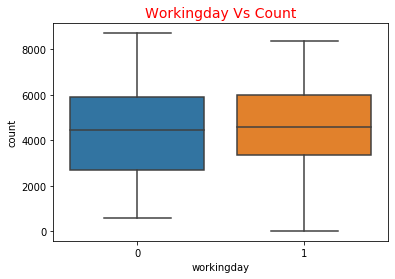

In [21]:
# To check how workingday variables varies with count variable
sns.boxplot(x = 'workingday', y = 'count', data = bikehire)
plt.title("Workingday Vs Count", fontsize=14, color= "red")

### Heat Map 

To get idea on values of correlation can check on heat map

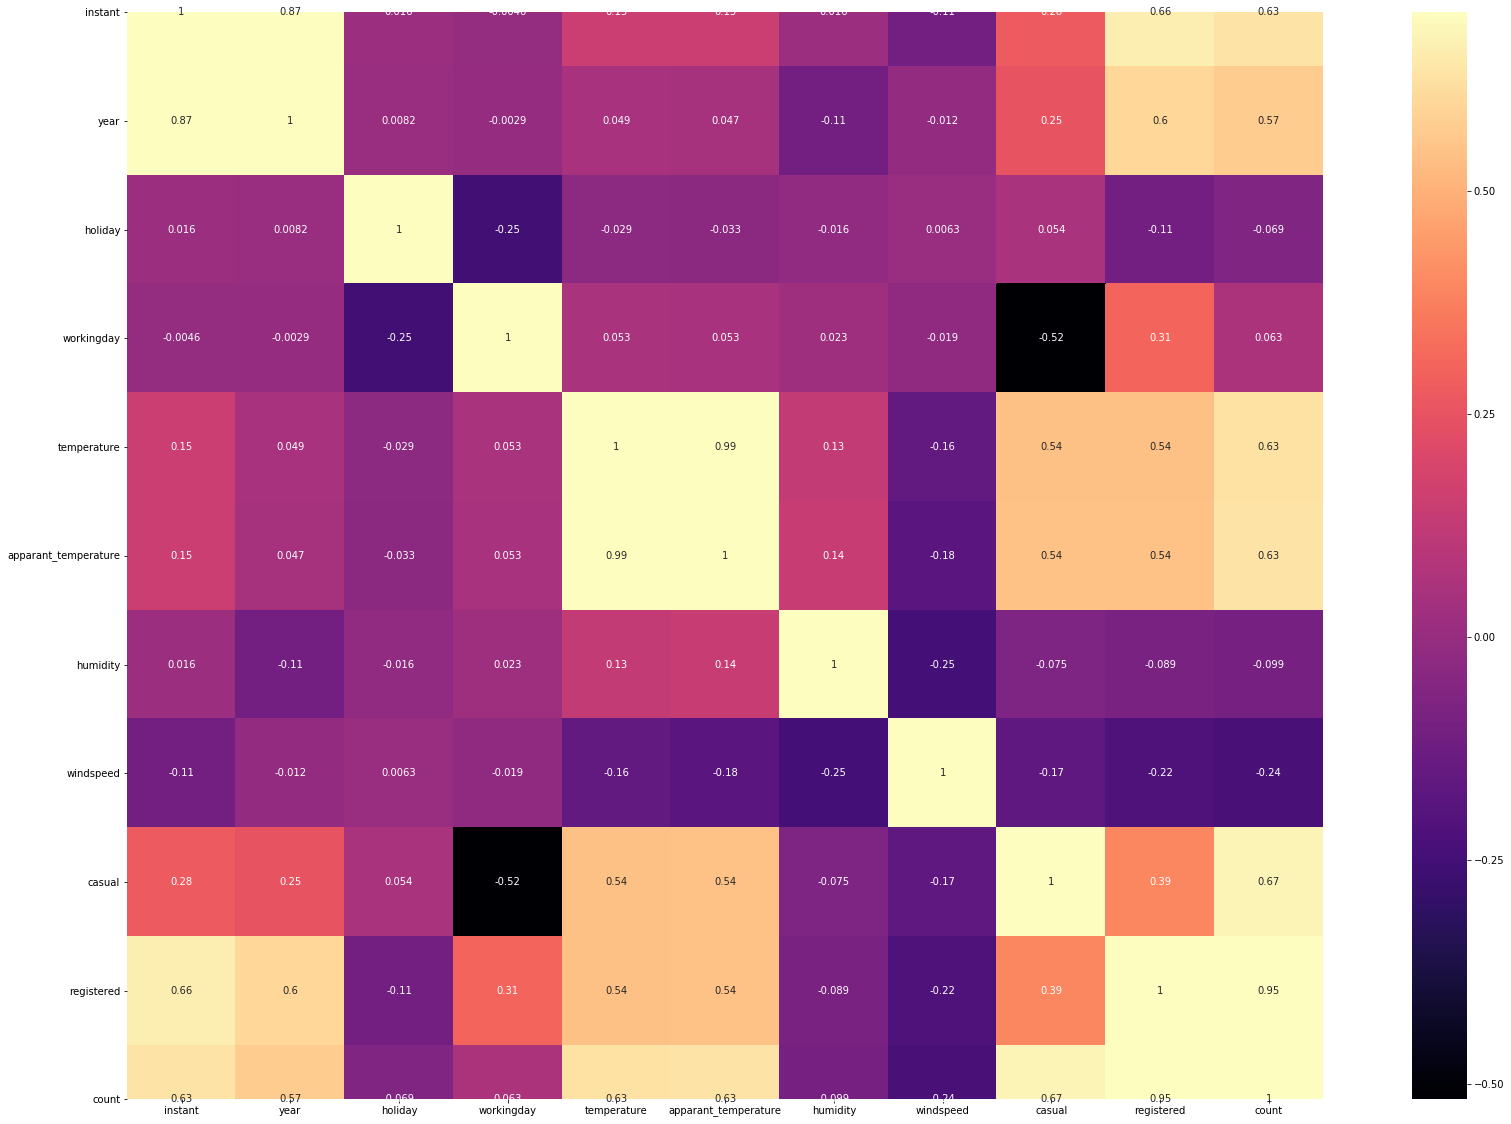

In [22]:
plt.figure(figsize=(32,20))
matrix=bikehire.corr()
sns.heatmap(matrix,vmax=0.7,square=True,cmap='magma',annot=True)

### Visualization Summary

- Instant variable is not that influencing on count of bike rental thus this collumn can be dropped.
- Number of Casual and Registered users aggregate to count, these two collumn can be dropped.
- dteday variable does not have that much influence over count varible.
- However there are other varibles like weekday, month, year which constitues to same data so dteday can be dropped.

### Data Preprocessing

Steps under Data Preprocessing 
- Data Encoding
- Splitting into training and test set
- Rescaling of variables

From the above visualization results lets drop the unwanted variables

#### Dropping of unwanted collumns

In [23]:
bikehire.drop(['instant','date','casual','registered'],axis=1,inplace=True)

In [24]:
bikehire.head()

,season,year,month,holiday,weekday,workingday,weathersit,temperature,apparant_temperature,humidity,windspeed,count
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


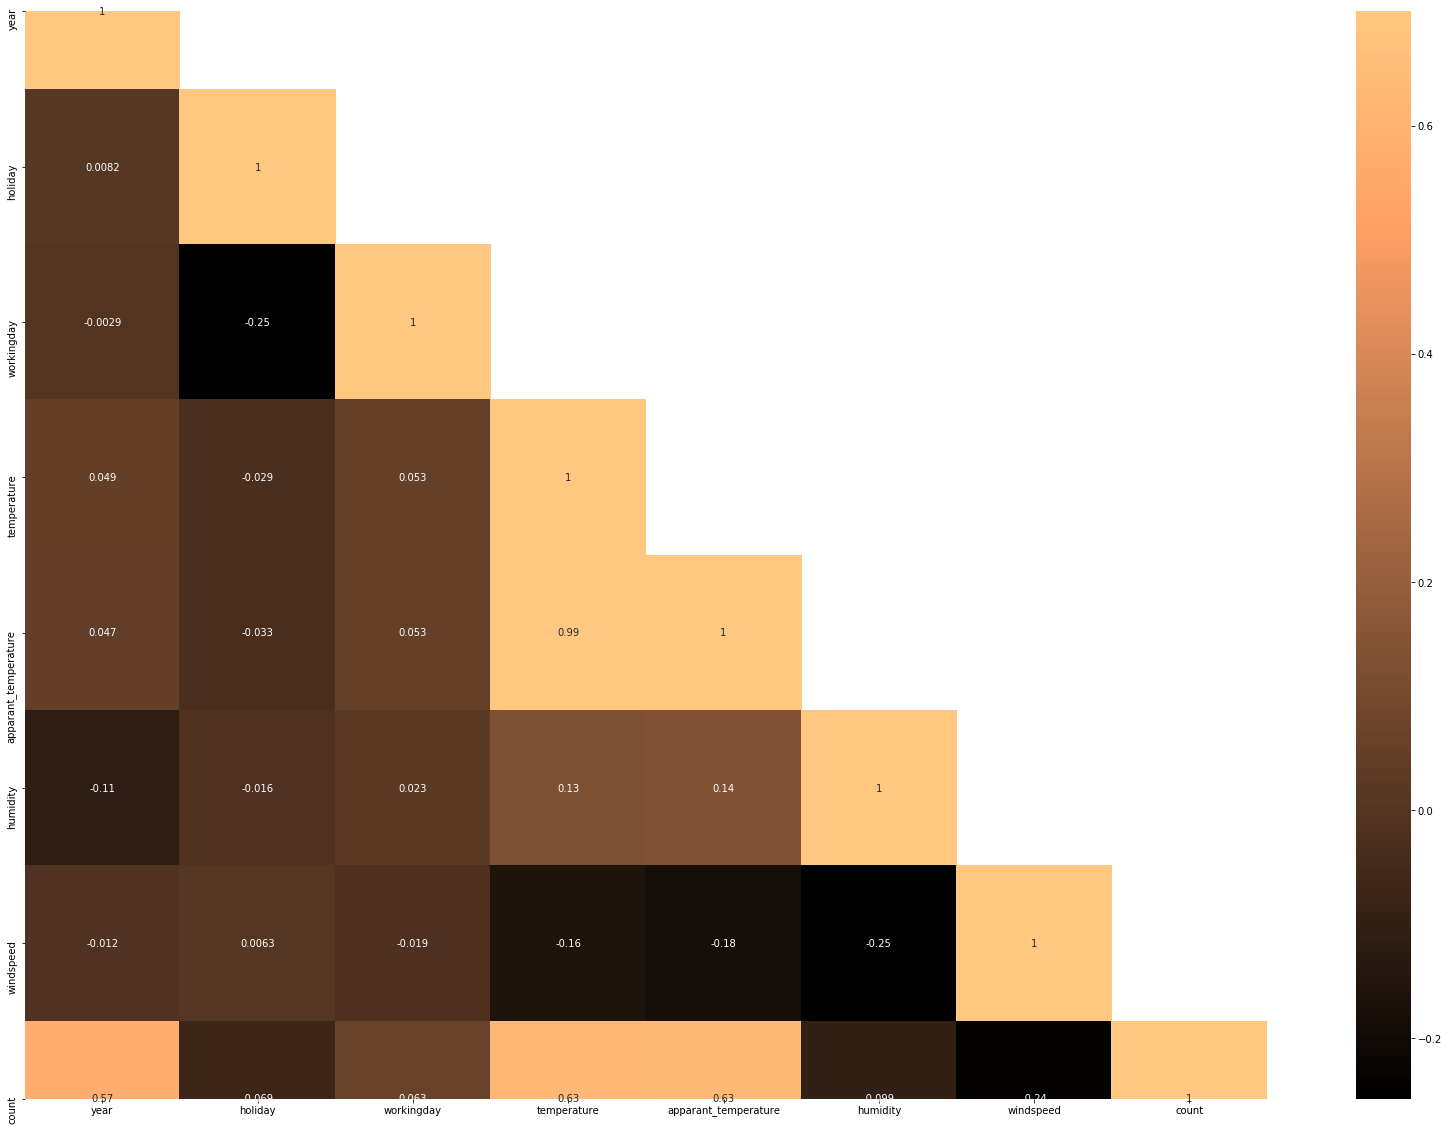

In [25]:
#Recheck the Collinearity of remaining variables
plt.figure(figsize=(32,20))

mask = np.array(bikehire.corr())
mask[np.tril_indices_from(mask)] = False
sns.heatmap(bikehire.corr(), mask=mask, vmax=.7, square=True, annot=True, cmap = "copper");

### Data Encoding

Converting the non numeric categorical variables to dummy variables

In [26]:
# Conversion of categorical variables to dummy variables

# Creation of month dummy variable
month = pd.get_dummies(bikehire['month'], drop_first=True)

# Creation of weekday dummy variable
weekday = pd.get_dummies(bikehire['weekday'], drop_first=True)

# Creation of weathersit dummy variable
weathersit = pd.get_dummies(bikehire['weathersit'], drop_first=True)

# Creation of season dummy variable
season = pd.get_dummies(bikehire['season'], drop_first=True)

In [27]:
# Concatenation of all dummy varible to bikehire dataset
bikehire=pd.concat([month,weekday,weathersit,season,bikehire],axis=1)

bikehire.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,month,holiday,weekday,workingday,weathersit,temperature,apparant_temperature,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [28]:
# Drop original variables since dummy variables are created
bikehire.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

bikehire.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,summer,winter,year,holiday,workingday,temperature,apparant_temperature,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [29]:
#Checking total number of columns present finally
bikehire.shape

(730, 30)

In [30]:
# To check if dummy varibles created are filled with 0's and 1's
bikehire.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Aug,730.0,0.084932,0.278971,0.000000,0.000000,0.000000,0.000000,1.000000
Dec,730.0,0.084932,0.278971,0.000000,0.000000,0.000000,0.000000,1.000000
Feb,730.0,0.076712,0.266317,0.000000,0.000000,0.000000,0.000000,1.000000
Jan,730.0,0.084932,0.278971,0.000000,0.000000,0.000000,0.000000,1.000000
Jul,730.0,0.084932,0.278971,0.000000,0.000000,0.000000,0.000000,1.000000
Jun,730.0,0.082192,0.274845,0.000000,0.000000,0.000000,0.000000,1.000000
Mar,730.0,0.084932,0.278971,0.000000,0.000000,0.000000,0.000000,1.000000
May,730.0,0.084932,0.278971,0.000000,0.000000,0.000000,0.000000,1.000000
Nov,730.0,0.082192,0.274845,0.000000,0.000000,0.000000,0.000000,1.000000
Oct,730.0,0.084932,0.278971,0.000000,0.000000,0.000000,0.000000,1.000000


Upon checking the values of Season, Month, Weekday, Weathersit collumns we understand that min value is 0 and max value is 1 for each of the collumns

### Spliting Data into Train set and Test Set

In [31]:
# Split into train & test set
bkhr_train, bkhr_test = train_test_split(bikehire, train_size = 0.7, random_state = 100)

# To check how many total collumns are present in train and test set
print ("Total collumns of Train Data: ", bkhr_train.shape)
print ("Total collumns of Test Data: ", bkhr_test.shape)

Total collumns of Train Data:  (510, 30)
Total collumns of Test Data:  (220, 30)


In [32]:
# To verify the train dataset
bkhr_train.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,summer,winter,year,holiday,workingday,temperature,apparant_temperature,humidity,windspeed,count
576,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,29.246653,33.1448,70.4167,11.083475,7216
426,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,16.980847,20.6746,62.1250,10.792293,4066
728,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,10.489153,11.5850,48.3333,23.500518,1796
482,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,15.443347,18.8752,48.9583,8.708325,4220
111,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,13.803347,16.0977,72.9583,14.707907,1683


In [33]:
# To verify the train dataset
bkhr_test.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,summer,winter,year,holiday,workingday,temperature,apparant_temperature,humidity,windspeed,count
184,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,29.793347,33.27085,63.7917,5.459106,6043
535,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,1,32.082500,36.04875,59.2083,7.625404,6211
299,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,1,19.270000,22.85230,81.2917,13.250121,2659
221,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,31.433347,34.24915,42.4167,13.417286,4780
152,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,29.315000,32.19710,30.5000,19.583229,4968


In [34]:
# To check on metrics for train dataset
bkhr_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Aug,510.0,0.096078,0.294988,0.000000,0.000000,0.000000,0.000000,1.000000
Dec,510.0,0.084314,0.278131,0.000000,0.000000,0.000000,0.000000,1.000000
Feb,510.0,0.066667,0.249689,0.000000,0.000000,0.000000,0.000000,1.000000
Jan,510.0,0.088235,0.283915,0.000000,0.000000,0.000000,0.000000,1.000000
Jul,510.0,0.076471,0.266010,0.000000,0.000000,0.000000,0.000000,1.000000
Jun,510.0,0.076471,0.266010,0.000000,0.000000,0.000000,0.000000,1.000000
Mar,510.0,0.098039,0.297660,0.000000,0.000000,0.000000,0.000000,1.000000
May,510.0,0.084314,0.278131,0.000000,0.000000,0.000000,0.000000,1.000000
Nov,510.0,0.086275,0.281045,0.000000,0.000000,0.000000,0.000000,1.000000
Oct,510.0,0.084314,0.278131,0.000000,0.000000,0.000000,0.000000,1.000000


Most of variables are represented in terms of 0's and 1's except some numeric variable collumns like temperature, apparant temperature, humidity, windspeed, count needs to be addressed using rescaling technique.

### Rescaling the Features

It is technique of bringing all the varibles into comparable scale. From the above observations we understood all variables are represented in terms of 0's and 1's except some of the numerical collumns. So they have to be rescaled that would help further in model evaluation.

In this context Min-Max Scaling technique is used for rescaling.

However by scaling it does not affect the model performance results.

In [35]:
# Instantiate an object
scaler = MinMaxScaler()
 
# Create the list of Numeric Variables to be scaled
num_vars = ['temperature','apparant_temperature','humidity','windspeed','count']
 
#fit on data
bkhr_train[num_vars]=scaler.fit_transform(bkhr_train[num_vars])
bkhr_train[num_vars].head()

,temperature,apparant_temperature,humidity,windspeed,count
576,0.815169,0.766351,0.725633,0.264686,0.827658
426,0.442393,0.438975,0.640189,0.255342,0.465255
728,0.245101,0.200348,0.498067,0.663106,0.204096
482,0.395666,0.391735,0.504508,0.188475,0.482973
111,0.345824,0.318819,0.751824,0.380981,0.191095


In [36]:
# checking the metrics after scaling
bkhr_train[num_vars].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
temperature,510.0,0.537440,0.225858,0.0,0.339853,0.542596,0.735215,1.0
apparant_temperature,510.0,0.513156,0.212410,0.0,0.332086,0.529718,0.688457,1.0
humidity,510.0,0.650480,0.145846,0.0,0.538643,0.653714,0.754830,1.0
windspeed,510.0,0.320883,0.169803,0.0,0.199179,0.296763,0.414447,1.0
count,510.0,0.513499,0.224421,0.0,0.356420,0.518638,0.684710,1.0


We now observe that all scaled numeric variable values are present between 0 and 1

In [37]:
bkhr_train.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,summer,winter,year,holiday,workingday,temperature,apparant_temperature,humidity,windspeed,count
576,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973
111,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095


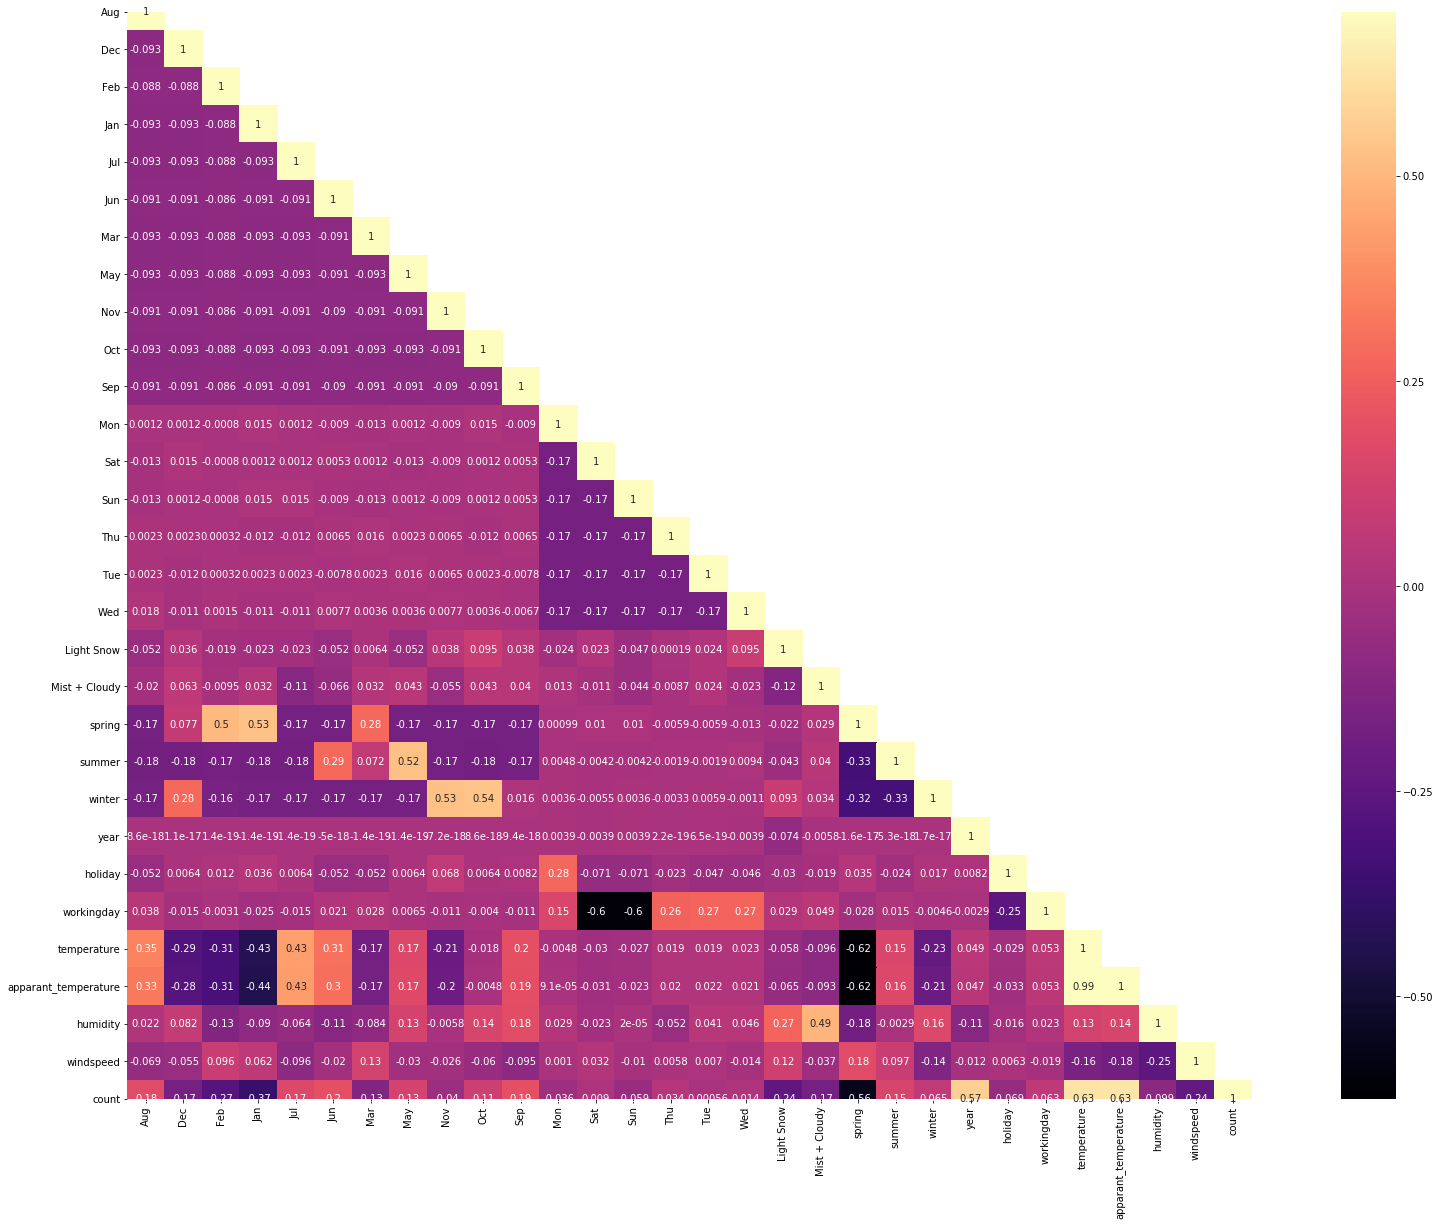

In [38]:
#Recheck the Collinearity of variables
plt.figure(figsize=(32,20))

mask = np.array(bikehire.corr())
mask[np.tril_indices_from(mask)] = False
sns.heatmap(bikehire.corr(), mask=mask, vmax=.7, square=True, annot=True, cmap = "magma");

Thus after scaling all the variables are present in between 0 and 1, thus ready for model evaluation.

### Building the Model

Before we work on building the model lets check the number of columns present int the dataset 

In [39]:
bikehire.columns

Index(['Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct',
       'Sep', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'Light Snow',
       'Mist + Cloudy', 'spring', 'summer', 'winter', 'year', 'holiday',
       'workingday', 'temperature', 'apparant_temperature', 'humidity',
       'windspeed', 'count'],
      dtype='object')

Here RFE - Recursive Feature Elimination method is used to build and traint the model. In RFE method we take all variables into consideration and gradually drop one by one which does not influence the target variable from the model.

#### Dividing the training dataset into X and Y sets

In [40]:
# Dividing the train data into X & y sets for model building

# X Train dataset
X_train = bkhr_train

# Y Train dataset
y_train = bkhr_train.pop('count')


#### Recursive Feature Elimination Method

To select feature one by one for training is a tedious process and to select all variables and then drop the variables one by one also seems to be confusing one. Therefore here `LinearRegression` function is utilised from `SciKit Learn` for its compatibility with RFE.

- This RFE is predefined function in Sklearn where it selects features by recursively. 
- This considers smaller and smaller sets of features. 
- First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through any specific attribute like coefficient, feature importance.
- Then, the least important features are removed from current set of features. 

In [41]:
# In this experiment initial number of output variables were selected to be 20 upon which some varibles had very high vif 
# Therefore number of output varibles was reset to 12

# Execute RFE with output number of variables = 12
lm = LinearRegression()

lm.fit(X_train, y_train)

rfe = RFE(lm, 12)
rfe = rfe.fit(X_train, y_train)

In [42]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Aug', False, 11),
 ('Dec', False, 5),
 ('Feb', False, 6),
 ('Jan', False, 4),
 ('Jul', True, 1),
 ('Jun', False, 17),
 ('Mar', False, 18),
 ('May', False, 10),
 ('Nov', False, 9),
 ('Oct', False, 14),
 ('Sep', True, 1),
 ('Mon', False, 15),
 ('Sat', False, 2),
 ('Sun', False, 8),
 ('Thu', False, 13),
 ('Tue', False, 16),
 ('Wed', False, 12),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temperature', True, 1),
 ('apparant_temperature', False, 7),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [43]:
# To view the column choosed by RFE
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Jul', 'Sep', 'Light Snow', 'Mist + Cloudy', 'spring', 'summer',
       'winter', 'year', 'holiday', 'temperature', 'humidity', 'windspeed'],
      dtype='object')

In [44]:
# To view the column not choosed by RFE
X_train.columns[~rfe.support_]

Index(['Aug', 'Dec', 'Feb', 'Jan', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Mon',
       'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'workingday',
       'apparant_temperature'],
      dtype='object')

### Building the model using statsmodel, for understanding p value, Rsquared, P(Fstatistic) metric

#### First Iteration Model Building

In [45]:
# Creating rfe dataframe with RFE selected variables
X_train_rfe = X_train[rfe_col]

In [46]:
X_train_bklm = sm.add_constant(X_train_rfe)

In [47]:
bklm = sm.OLS(y_train,X_train_bklm).fit()   # Running the linear model

In [48]:
#Let's see the summary of our linear model
print(bklm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          2.95e-190
Time:                        17:18:58   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2848      0.034      8.258

In [49]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,humidity,28.03
9,temperature,16.03
11,windspeed,4.65
4,spring,4.01
6,winter,3.33
5,summer,2.79
3,Mist + Cloudy,2.28
7,year,2.08
0,Jul,1.58
1,Sep,1.38


When we observe the data its observed that variable `humidity` has `high vif` therefore this variable need to be dropped.

In [50]:
X_train_rfe = X_train_rfe.drop(['humidity'], axis = 1)

#### Second Iteration Model Building

In [51]:
# Adding a constant variable 
X_train_bklm = sm.add_constant(X_train_rfe)
bklm = sm.OLS(y_train,X_train_bklm).fit()   # Running the linear model
bklm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          5.06e-187
Time:                        17:18:58   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1994      0.030      6.746      0.000       0.141       0.258
Jul              -0.0521      0.019     -2.790      0.005      -0.089      -0.015
Sep               0.0768      0.017      4.517      0.000       0.043       0.110
Light Snow       -0.2842      0.025    -11.487      0.000      -0.333      -0.236
Mist + Cloudy    -0.0802      0.009     -9.146      0.000      -0.097      -0.063
spring           -0.0672      0.021     -3.175      0.002      -0.109      -0.026
summer            0.0465      0.015      3.051      0.002       0.017       0.076
winter            0.0817      0.017      4.730      0.000       0.048       0.116
year              0.2336      0.008     28.352      0.000       0.217       0.250
holiday          -0.0975      0.026     -3.736      0.000      -0.149      -0.046
temperature       0.4910      0.033     14.770      0.000       0.426       0.556
windspeed        -0.1479      0.025     -5.887      0.000      -0.197      -0.099
==============================================================================
Omnibus:                       59.182   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.016
Skew:                          -0.629   Prob(JB):                     7.92e-30
Kurtosis:                       5.173   Cond. No.                         17.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temperature,5.09
10,windspeed,4.60
5,summer,2.23
4,spring,2.08
7,year,2.07
6,winter,1.78
0,Jul,1.58
3,Mist + Cloudy,1.55
1,Sep,1.34
2,Light Snow,1.08


### Model Insights

- From the above model evaluation from `VIF table` and `stats summary` table, we have reached the stage where all the `p values` are in acceptable range. All `VIF values` are below 5 except temperature being `5.09` which is fine as temperature is the major influencing factor towards count of bike rentals hired.

- One more attribute to be checked upon `Probablity of F-Statistic` is very low `5.06e-187`, meaning that model is not developed by chance but it is statistically significant.

### Residual Analysis of Training data

To reconfirm if the error terms are also normally distributed (which is the major assumptions of linear regression), can plot the histogram of the error terms and further check on the observations

In [53]:
y_train_cnt = bklm.predict(X_train_bklm)

Text(0.5, 0, 'Errors')

<Figure size 432x288 with 0 Axes>

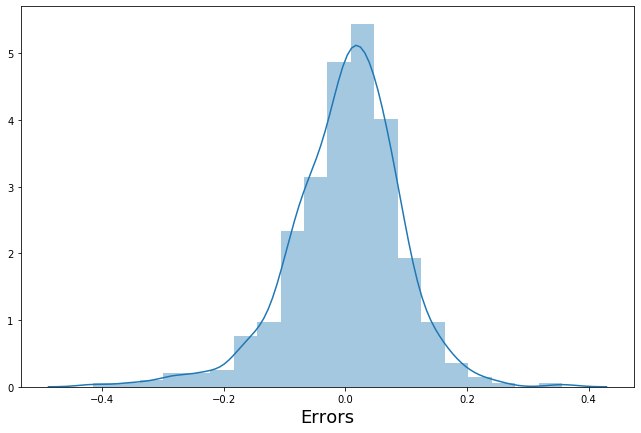

In [54]:
# Plot the histogram of the error terms
fig = plt.figure()
plt.figure(figsize=(11,7))
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

From the above observations it is observed that errors have normal distribution.

### Model Predictions and Final Model Evaluation

Scaling of the test sets

In [55]:
num_test = ['temperature','apparant_temperature','humidity','windspeed','count']

bkhr_test[num_vars] = scaler.transform(bkhr_test[num_vars])

In [56]:
bkhr_test.describe()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,summer,winter,year,holiday,workingday,temperature,apparant_temperature,humidity,windspeed,count
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,...,0.263636,0.236364,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154
std,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,...,0.441609,0.425817,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


#### Diving Test set into X_test and y_test

In [57]:
y_test = bkhr_test.pop('count')
X_test = bkhr_test

In [58]:
X_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Aug,220.0,0.059091,0.236333,0.000000,0.000000,0.000000,0.000000,1.000000
Dec,220.0,0.086364,0.281541,0.000000,0.000000,0.000000,0.000000,1.000000
Feb,220.0,0.100000,0.300684,0.000000,0.000000,0.000000,0.000000,1.000000
Jan,220.0,0.077273,0.267633,0.000000,0.000000,0.000000,0.000000,1.000000
Jul,220.0,0.104545,0.306665,0.000000,0.000000,0.000000,0.000000,1.000000
Jun,220.0,0.095455,0.294512,0.000000,0.000000,0.000000,0.000000,1.000000
Mar,220.0,0.054545,0.227609,0.000000,0.000000,0.000000,0.000000,1.000000
May,220.0,0.086364,0.281541,0.000000,0.000000,0.000000,0.000000,1.000000
Nov,220.0,0.072727,0.260281,0.000000,0.000000,0.000000,0.000000,1.000000
Oct,220.0,0.086364,0.281541,0.000000,0.000000,0.000000,0.000000,1.000000


When observing the min and max values we do see some values in max which is 1 or value nearing 1 the same with min value which is 0 or value nearing 0. This is because unlike training scaling here during scaling the test data set we have just used tranform function on the trained model.

In [59]:
# predicting using values used by the final model
test_col = X_train_bklm.columns
X_test=X_test[test_col[1:]]

# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 12 columns):
const            220 non-null float64
Jul              220 non-null uint8
Sep              220 non-null uint8
Light Snow       220 non-null uint8
Mist + Cloudy    220 non-null uint8
spring           220 non-null uint8
summer           220 non-null uint8
winter           220 non-null uint8
year             220 non-null int64
holiday          220 non-null int64
temperature      220 non-null float64
windspeed        220 non-null float64
dtypes: float64(3), int64(2), uint8(7)
memory usage: 11.8 KB


In [60]:
# Making predictions using the Second model
y_bkpred = bklm.predict(X_test)

In [61]:
#Calculating RSquare value
r2_score(y_test, y_bkpred)

0.8052680349048551

Text(0, 0.5, 'y_pred')

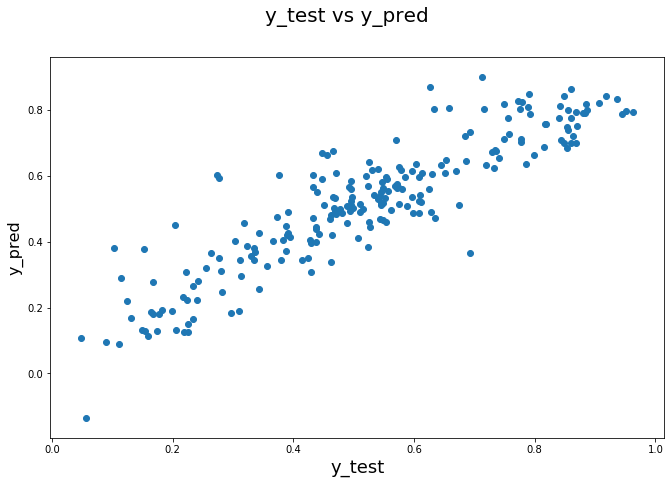

In [62]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure(figsize=(11,7))
plt.scatter(y_test, y_bkpred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

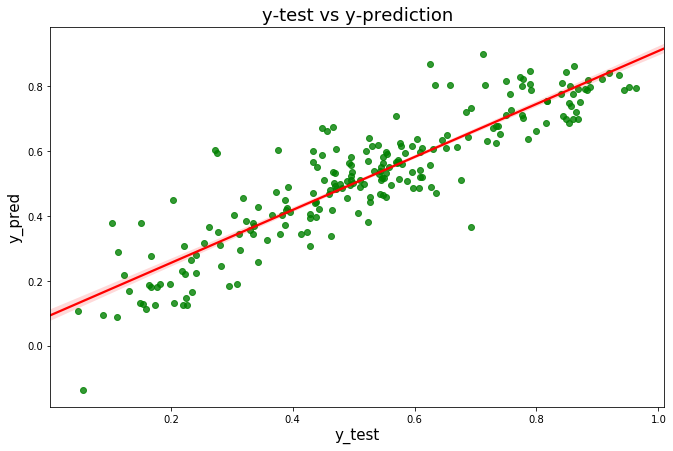

In [63]:
#Regression plot
plt.figure(figsize=(11,7))
sns.regplot(x=y_test, y=y_bkpred, ci=68, fit_reg=True,scatter_kws={"color": "green"}, line_kws={"color": "red"})

plt.title('y-test vs y-prediction', fontsize=18)              
plt.xlabel('y_test', fontsize=15)                          
plt.ylabel('y_pred', fontsize=15)                          
plt.show()

### Observations:
- R2 values is aorund 80.5% - which is good.
- VIF values are aorund 5.
- p values of cofficients are minimal.
- There is the linear relation between y_test and y-pred which is also very good.
- In Residual Analysis is normally distributed having mean at 0.

In [64]:
param = pd.DataFrame(bklm.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,12))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
10,temperature,0.490988
8,year,0.233570
0,const,0.199434
7,winter,0.081741
2,Sep,0.076846
6,summer,0.046487
1,Jul,-0.052057
5,spring,-0.067169
4,Mist + Cloudy,-0.080167


The equation of our best fitted line is:

`count` = 0.199434 + 0.490988 X `temperature` + 0.233570 X `year` + 0.081741 X `winter` + 0.076846 X `Sep` + 0.046487 X `summer` - 0.052057 X `Jul` -0.067169 X `spring` -0.284199 X `Light Snow` -0.080167 X `Mist & Cloudy` -0.097463 X `holiday` -0.147919 X `windspeed`

## Conclusion

- `Temparature` is the varible with highest coefficiant value there by which influences count of bike rentals directly.
- `Year` - bike rental count is increasing every year.
- `September` is the month where count of bike rentals is more.
- `Light Snow` and `windspeed` has negative coefficiant value indicating that as there value increase count of bike rentals become less.

## Final Analysis for Bhoom Bikes to improve Business Plan

- Bhoom Bike Company need to concentrate on temperature factor as when it would be good to improve count of bike rentals.
- How to plan to make sales better year by year as market is growing each year.
- Also giving additional ride offers during good weather time to improve bike rental count as it makes up decrease of sales due to rain snow and misty weather time.